Arboles de decision 

In [3]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:


#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Vinos.csv")
data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.shape

(1599, 12)

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

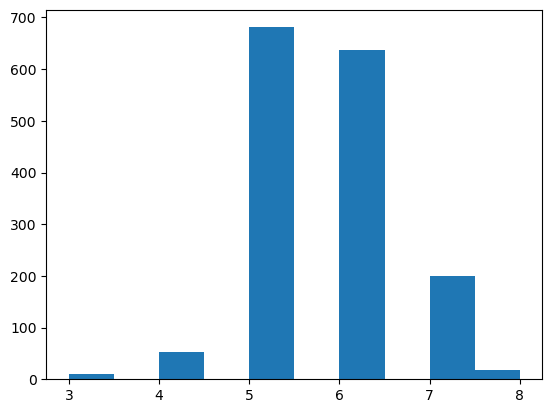

In [19]:
plt.hist(data.quality)

Podemos observar que el histograma existen vinos de diferente calidad

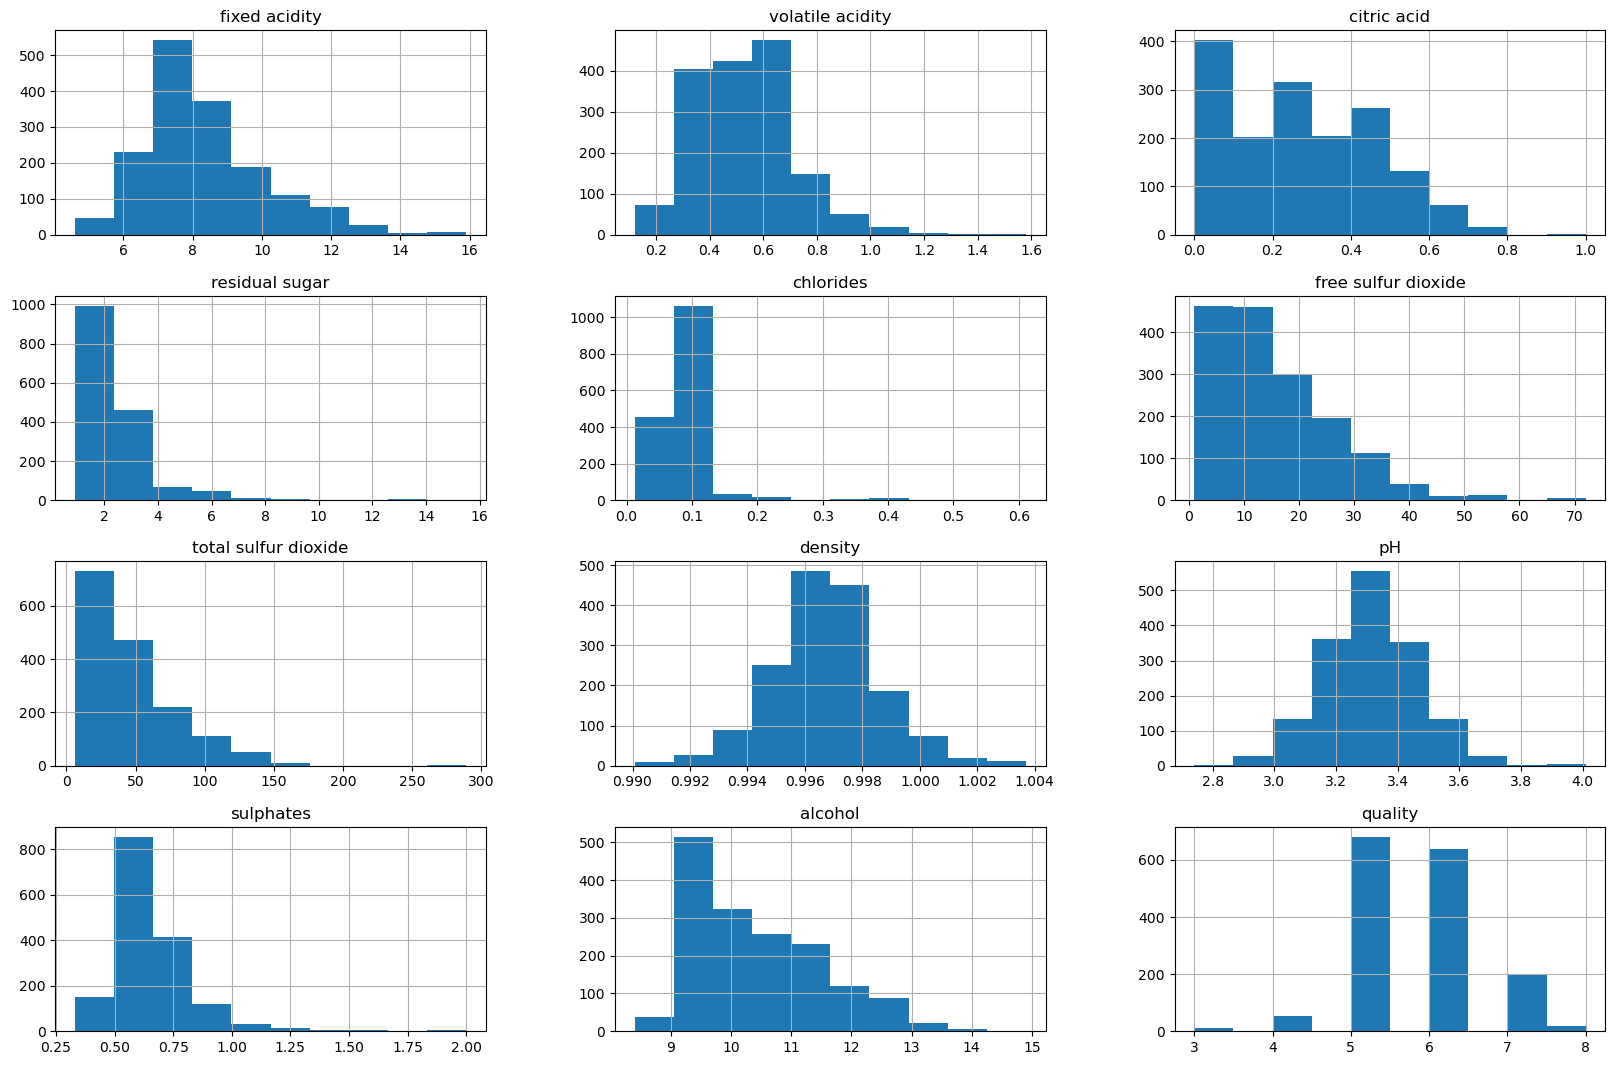

In [24]:
# se muestra un histograma para observar los datos agregados mas detalladamente
data.hist(figsize =(20,13))
plt.show()

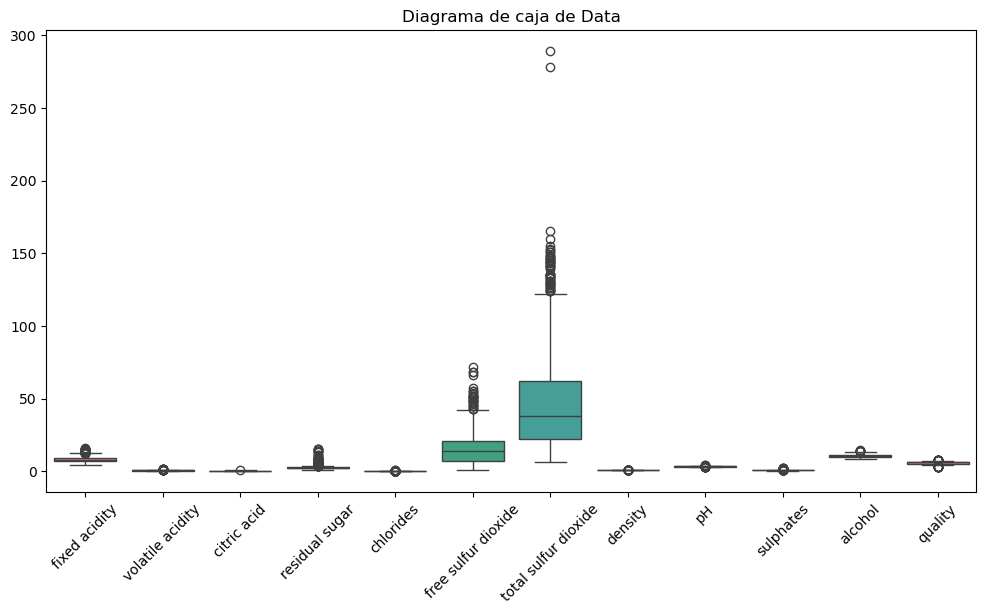

In [26]:
# Identificar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data = data  )
plt.title('Diagrama de caja de Data')
plt.xticks(rotation=45)
plt.show()

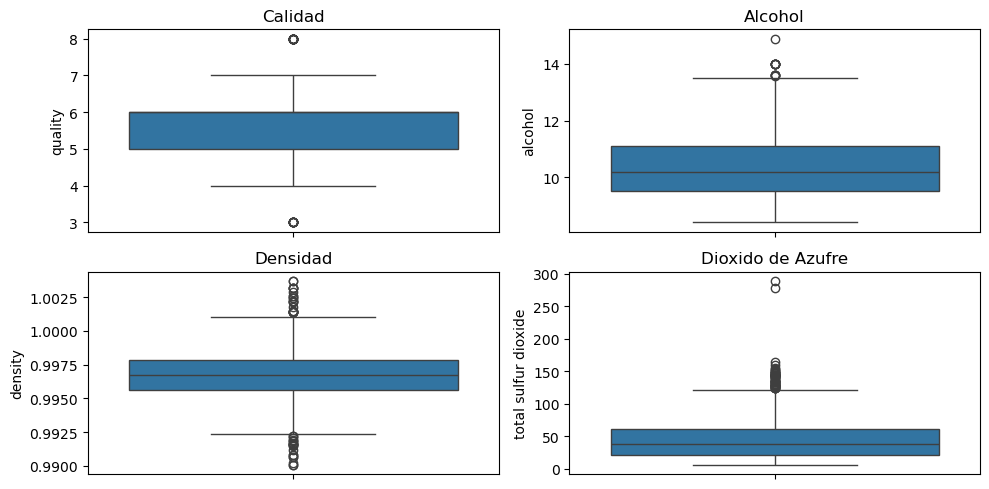

In [28]:
# Figuras de valores faltantes y atipicos
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(data['quality'], ax = axs[0,0]).set_title("Calidad")
plt2 = sns.boxplot(data['alcohol'], ax = axs[0,1]).set_title("Alcohol")
plt3 = sns.boxplot(data['density'], ax = axs[1,0]).set_title("Densidad")
plt1 = sns.boxplot(data['total sulfur dioxide'], ax = axs[1,1]).set_title("Dioxido de Azufre")

plt.tight_layout()

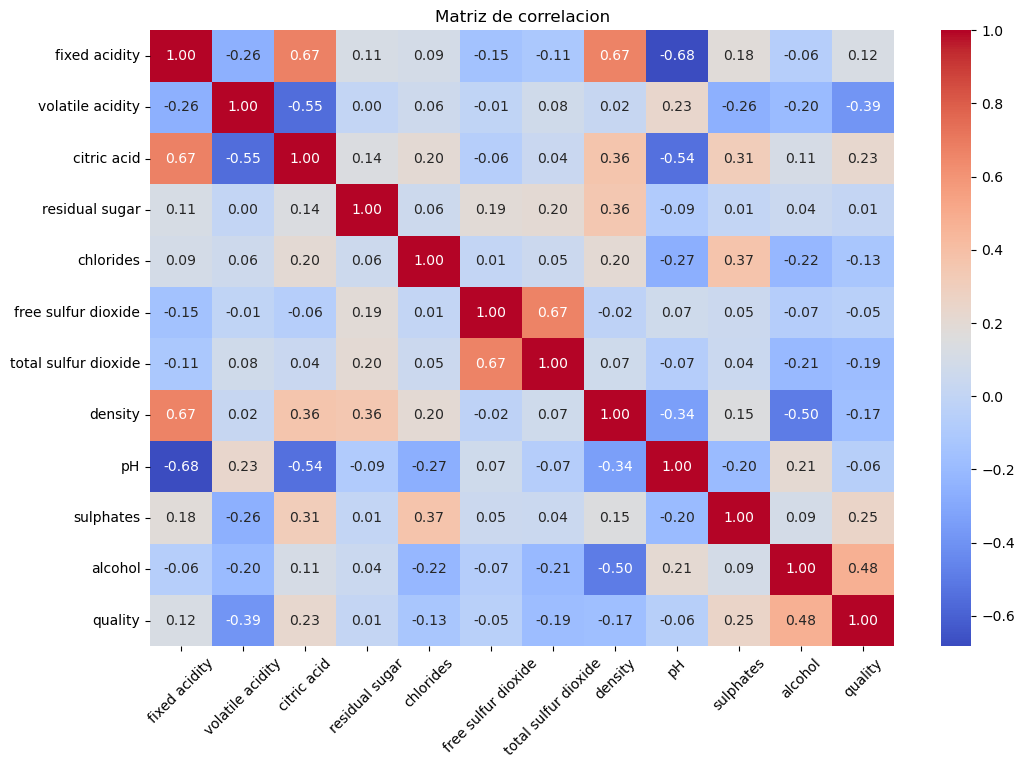

In [30]:
# Analisis de correlacion
correlacion = data.corr()
plt.figure(figsize =(12,8))
sns.heatmap(correlacion, annot = True, cmap ='coolwarm', fmt =".2f")
plt.title('Matriz de correlacion')
plt.xticks(rotation=45)
plt.show()

Podemos observar en la matriz que cada variable se relaciona con los demas 

In [32]:
# verificar que variables tienen mas correlaciones
correlacion_variableobjetivo = correlacion['quality'].abs().sort_values(ascending = False)
variables_mascorrelacionadas = correlacion_variableobjetivo[1:]
print(variables_mascorrelacionadas)

alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


In [34]:
# Obtener las características más relevantes 

# Dividir los datos en características (X) y variable objetivo (y)
X = data.drop('quality',axis=1)  # Excluir la variable objetivo
y = data['quality']

In [36]:


# mostrar las caracteristicas de x
print("Caracteristicas x")
print(X)



Caracteristicas x
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      fre

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [40]:
#mostrar las caracteristicas de y
print("Caracteristicas y")
print(y.head())

Caracteristicas y
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [42]:
# muestra si hay datos NaN en la variable x 
nan_values_X = X.isna().sum()
print("Valores NaN en las características seleccionadas (X):")
print(nan_values_X)

Valores NaN en las características seleccionadas (X):
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [46]:
# establecer la prediccion 
predictors_col=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
target_col = ["quality"]

# Código de prediccion con la datasets
predictors = data[predictors_col]
target = data[target_col]

# ver el listado de prediccion 
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [48]:
# ver la target
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [50]:
# identificar la correlacion de la prediccion 
corr= predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


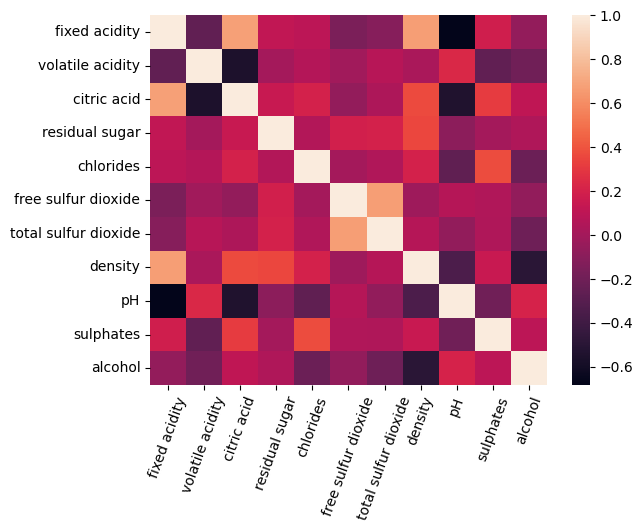

In [52]:
# mapa de calor
sns.heatmap(corr)
plt.xticks(rotation=70)
plt.show()

In [54]:
# Seleccionar las características relevantes
X = data[['volatile acidity', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]

# Seleccionar la variable objetivo
y = data['quality']

# Dividir los datos imputados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=42)

tree = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
prediccion = tree.predict(X_test)
prediccion

array([5, 4, 5, 5, 6, 5, 5, 5, 7, 6, 7, 5, 5, 5, 6, 6, 5, 7, 7, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5,
       7, 5, 7, 5, 5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 7, 5, 5, 8, 6, 5, 6, 6,
       6, 6, 6, 5, 6, 5, 6, 4, 6, 5, 7, 5, 6, 7, 5, 7, 5, 6, 7, 7, 5, 6,
       7, 5, 7, 7, 4, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 5, 7, 7,
       7, 5, 7, 5, 5, 7, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 7, 5, 5, 6, 6, 5,
       5, 6, 5, 6, 5, 6, 6, 6, 7, 6, 5, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 5,
       6, 5, 7, 7, 5, 6, 7, 6, 6, 5, 5, 5, 6, 5, 7, 5, 5, 4, 7, 5, 7, 7,
       6, 5, 5, 5, 4, 6, 7, 7, 5, 7, 6, 6, 6, 5, 6, 7, 4, 7, 6, 5, 5, 6,
       6, 7, 5, 6, 5, 5, 7, 4, 5, 6, 6, 5, 8, 5, 5, 7, 6, 4, 6, 5, 5, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 6, 4, 6, 6, 5, 7, 5, 7, 6, 5, 5, 6,
       5, 7, 5, 7, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 4, 5, 7, 8, 5, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 8, 7, 6, 6, 5, 6, 6, 5, 7,
       5, 6, 5, 6, 7, 6, 8, 5, 5, 6, 5, 7, 7, 6, 5,

In [68]:
from sklearn.preprocessing import StandardScaler
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de árboles de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Precisión del modelo
precision = accuracy_score(y_test, prediccion)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.5725


In [72]:
from sklearn.metrics import confusion_matrix
# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, prediccion)
print("Matriz de confusión:")
print(matriz_confusion)

Matriz de confusión:
[[  0   0   1   0   0   0]
 [  0   1   5   7   0   0]
 [  0   7 112  34  11   0]
 [  0   8  44  88  25   4]
 [  0   1   3  13  28   3]
 [  0   0   1   1   3   0]]


In [92]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)
# Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

[[  0   1   0   0   0   0]
 [  0   1   5   6   1   0]
 [  2   4 115  34   9   0]
 [  0   7  46  91  23   2]
 [  0   1   3  13  28   3]
 [  0   0   1   1   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.08      0.07        13
           5       0.68      0.70      0.69       164
           6       0.63      0.54      0.58       169
           7       0.44      0.58      0.50        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.30      0.32      0.31       400
weighted avg       0.60      0.59      0.59       400



[Text(0.556045305676856, 0.9736842105263158, 'x[10] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [9, 40, 517, 469, 151, 13]'),
 Text(0.3920032751091703, 0.9210526315789473, 'x[6] <= 98.5\ngini = 0.541\nsamples = 737\nvalue = [6.0, 27.0, 439.0, 235.0, 28.0, 2.0]'),
 Text(0.47402429039301314, 0.9473684210526316, 'True  '),
 Text(0.23466157205240173, 0.868421052631579, 'x[9] <= 0.575\ngini = 0.569\nsamples = 643\nvalue = [6.0, 26.0, 352.0, 230.0, 27.0, 2.0]'),
 Text(0.07060589519650655, 0.8157894736842105, 'x[10] <= 9.75\ngini = 0.501\nsamples = 248\nvalue = [4, 20, 165, 55, 4, 0]'),
 Text(0.04017467248908297, 0.7631578947368421, 'x[3] <= 4.35\ngini = 0.397\nsamples = 157\nvalue = [2.0, 11.0, 119.0, 24.0, 1.0, 0.0]'),
 Text(0.0314410480349345, 0.7105263157894737, 'x[8] <= 3.54\ngini = 0.36\nsamples = 150\nvalue = [2, 9, 118, 20, 1, 0]'),
 Text(0.02794759825327511, 0.6578947368421053, 'x[10] <= 9.075\ngini = 0.338\nsamples = 147\nvalue = [2, 9, 118, 17, 1, 0]'),
 Text(0.013973799126637

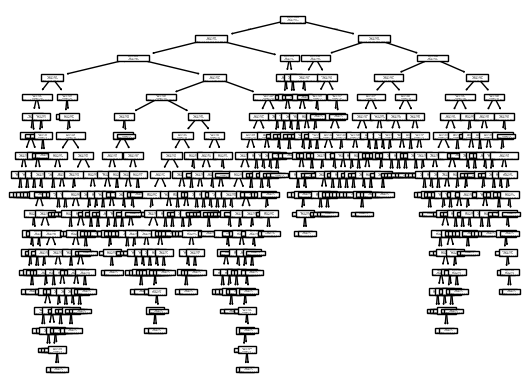

In [94]:


arbol= tree.fit(X_train, y_train)
plot_tree(arbol)



In [96]:
predicciones = arbol.predict(X_test)
predicciones

array([5, 4, 5, 5, 6, 5, 5, 5, 6, 6, 7, 4, 5, 5, 6, 6, 5, 5, 7, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5,
       7, 5, 7, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5, 8, 6, 5, 6, 6,
       6, 6, 7, 5, 6, 6, 6, 4, 6, 5, 7, 5, 6, 7, 5, 7, 5, 6, 7, 7, 5, 6,
       7, 5, 7, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 5, 7, 7,
       7, 5, 7, 5, 5, 7, 6, 4, 5, 5, 7, 6, 6, 6, 5, 5, 7, 5, 5, 6, 6, 5,
       5, 6, 5, 6, 5, 6, 6, 6, 7, 6, 5, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 5,
       6, 5, 7, 7, 5, 6, 7, 6, 7, 5, 5, 5, 6, 5, 7, 5, 5, 4, 7, 6, 7, 7,
       6, 5, 5, 5, 4, 6, 7, 7, 5, 6, 6, 6, 6, 6, 6, 7, 5, 7, 6, 5, 5, 6,
       6, 7, 5, 6, 5, 5, 7, 4, 5, 6, 6, 5, 8, 5, 5, 7, 6, 4, 6, 5, 5, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 6, 4, 6, 6, 5, 7, 5, 7, 6, 5, 5, 5,
       5, 7, 5, 7, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 4, 5, 7, 8, 7, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 8, 7, 6, 7, 5, 6, 6, 5, 7,
       5, 6, 5, 6, 7, 6, 8, 5, 5, 6, 5, 7, 7, 6, 5,

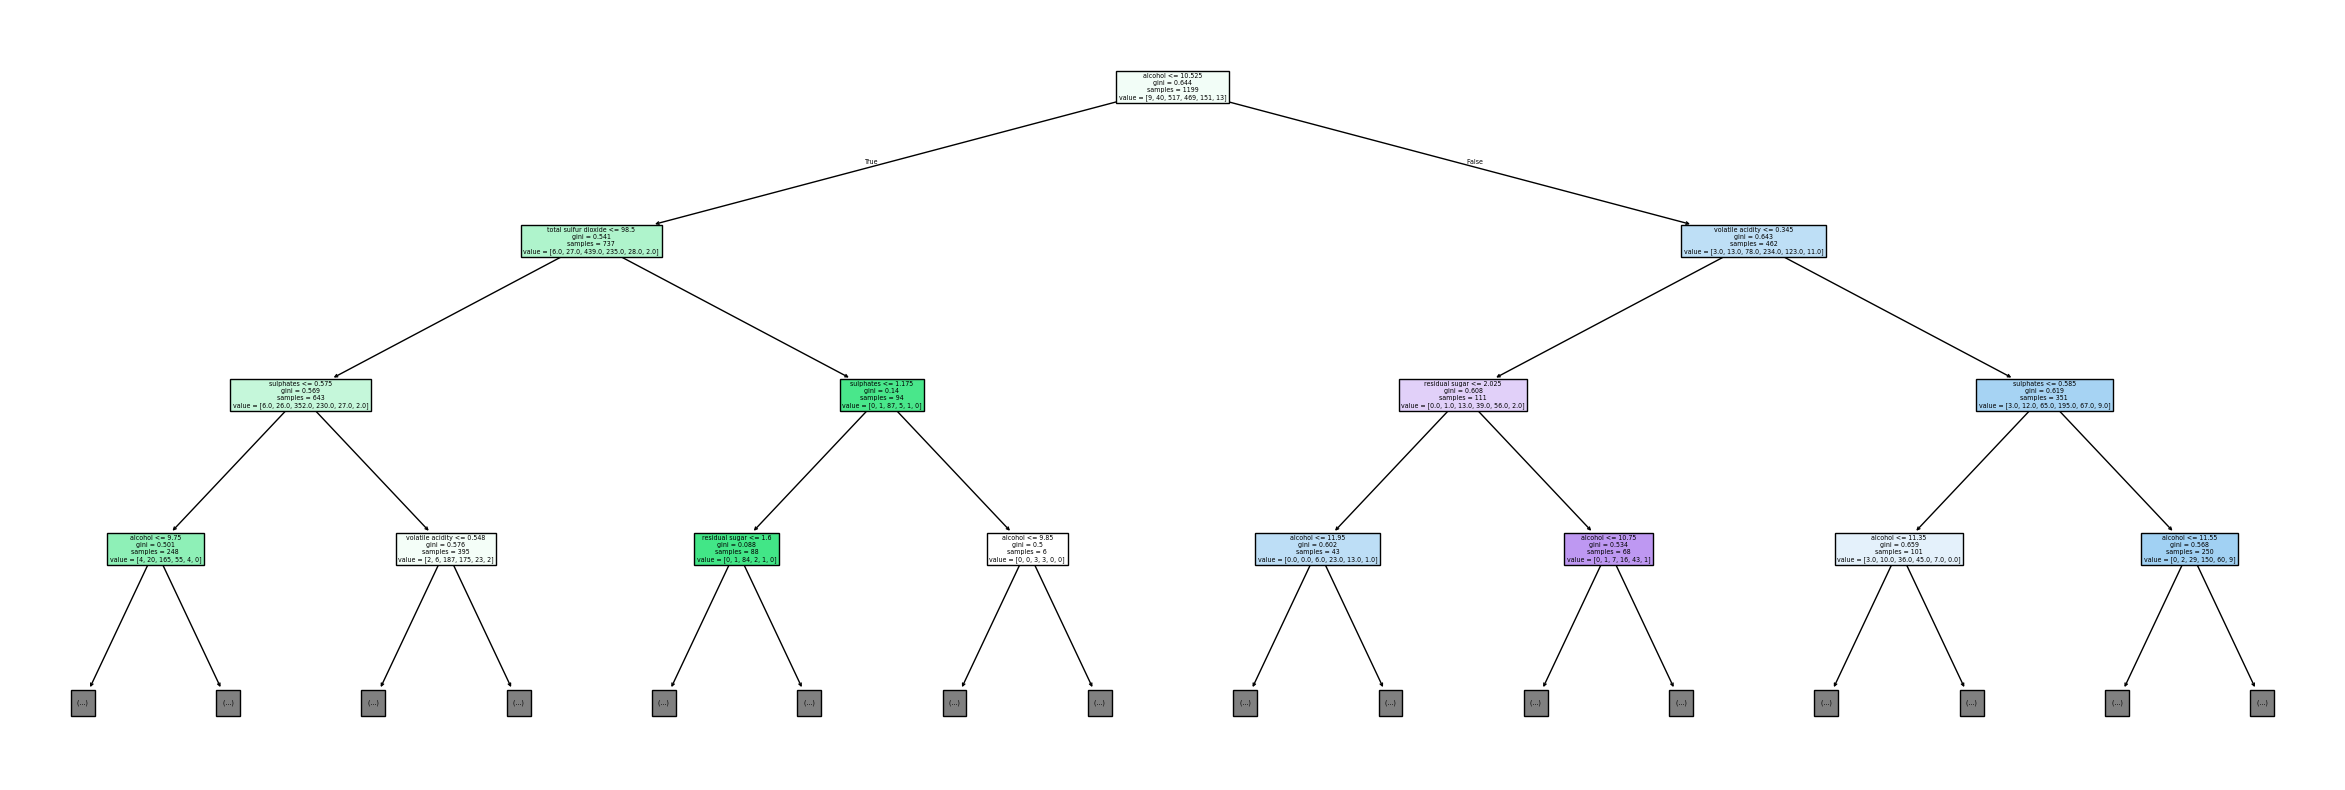

In [98]:


# Visualizar las primeras 5 ramas del árbol de decisión
plt.figure(figsize=(30,10))
plot_tree(arbol, max_depth=3, filled=True, feature_names=X_train.columns)
plt.show()



In [100]:
# examinamos la matriz de confusion 
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]),prediccion, rownames=['actual'],colnames=['Predicciones'])

Predicciones,4,5,6,7,8
actual,,,,,
3,0,1,0,0,0
4,1,5,7,0,0
5,7,112,34,11,0
6,8,44,88,25,4
7,1,3,13,28,3
8,0,1,1,3,0


C:\Users\keidi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


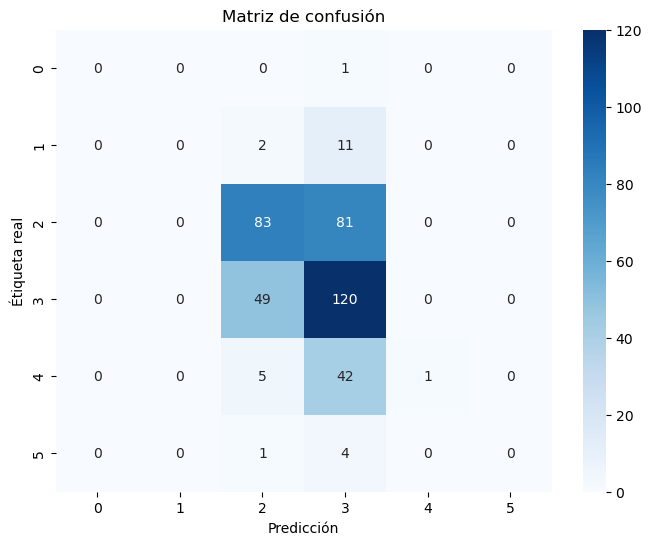

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Importar el clasificador SVM
# Definir e inicializar el clasificador SVM
clf = SVC()
clf.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Étiqueta real')
plt.title('Matriz de confusión')
plt.show()